# Phase 1 Data Science Project

## Student Details

Student Name: Louis Ragen

DSF-PT08
Date : 2nd *September* 2024- 6th *September* 2024

## Introduction/Problem Statement

*Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.*

## Objective/Deliverales

* A non-technical presentation
* A Jupyter Notebook
* A GitHub repository
* An Interactive Dashboard







## Available DataSets


1.   Aviation Data
2.   US State Codes



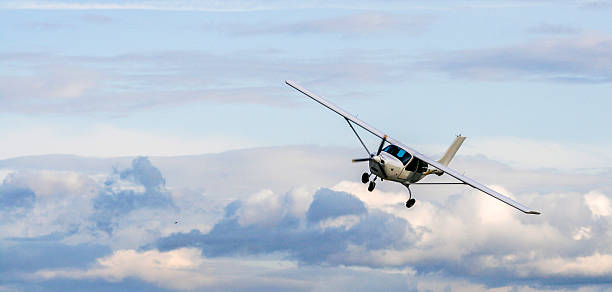

## Project Overview

My project intends to best advice the company above on the best planes to start their business with. We will be checking all available columns and data and the accuracy of the same to determine what to use. We may have some assumptions for data not available.

The work will be divided as follows

1. Data Understanding /Structure/ Data Cleaning
2. Exploratory Data Analysis
3. Data Visualization




## 1. Data Cleaning and Preparation

We check what is contained in the data to be able to extract the required information.

In [4]:
# Add all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Reading the csv files

In [5]:
#reading the csv files and checking the content

state_codes=pd.read_csv('USState_Codes.csv')
av_data=pd.read_csv('AviationData.csv',encoding='ISO-8859-1',low_memory=False)

In [6]:
#Description of the data

state_codes.describe().T

,count,unique,top,freq
US_State,62,62,Alabama,1
Abbreviation,62,62,AL,1


In [7]:
#Description of the data

av_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total.Fatal.Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total.Serious.Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total.Minor.Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total.Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0


In [8]:
#Get basic information about the data sets

state_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [9]:
#Get basic information about the data sets

av_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [10]:
#check top values
state_codes.head(2)

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK


In [11]:
#check top values
av_data.head(2)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996


In [12]:
# Checking the shape of the data sets

state_code_shape=state_codes.shape
av_data_shape=av_data.shape
print(f'The State codes data has {state_code_shape[0]} rows and {state_code_shape[1]} columns')
print(f'and the Aviation data has {av_data_shape[0]} rows and {av_data_shape[1]} columns')

The State codes data has 62 rows and 2 columns
and the Aviation data has 88889 rows and 31 columns


In [13]:
#check the relevant columns of state codes

state_codes_columns=list(state_codes.columns)

state_codes_columns


['US_State', 'Abbreviation']

In [14]:
#check the relevant columns of aircraft data
av_data_columns=list(av_data.columns)
av_data_columns

['Event.Id',
 'Investigation.Type',
 'Accident.Number',
 'Event.Date',
 'Location',
 'Country',
 'Latitude',
 'Longitude',
 'Airport.Code',
 'Airport.Name',
 'Injury.Severity',
 'Aircraft.damage',
 'Aircraft.Category',
 'Registration.Number',
 'Make',
 'Model',
 'Amateur.Built',
 'Number.of.Engines',
 'Engine.Type',
 'FAR.Description',
 'Schedule',
 'Purpose.of.flight',
 'Air.carrier',
 'Total.Fatal.Injuries',
 'Total.Serious.Injuries',
 'Total.Minor.Injuries',
 'Total.Uninjured',
 'Weather.Condition',
 'Broad.phase.of.flight',
 'Report.Status',
 'Publication.Date']

In [15]:
#Check state codes if there are any null values
state_codes.isna().any()

US_State        False
Abbreviation    False
dtype: bool

In [16]:
#Check state codes if there are any null values
av_data.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

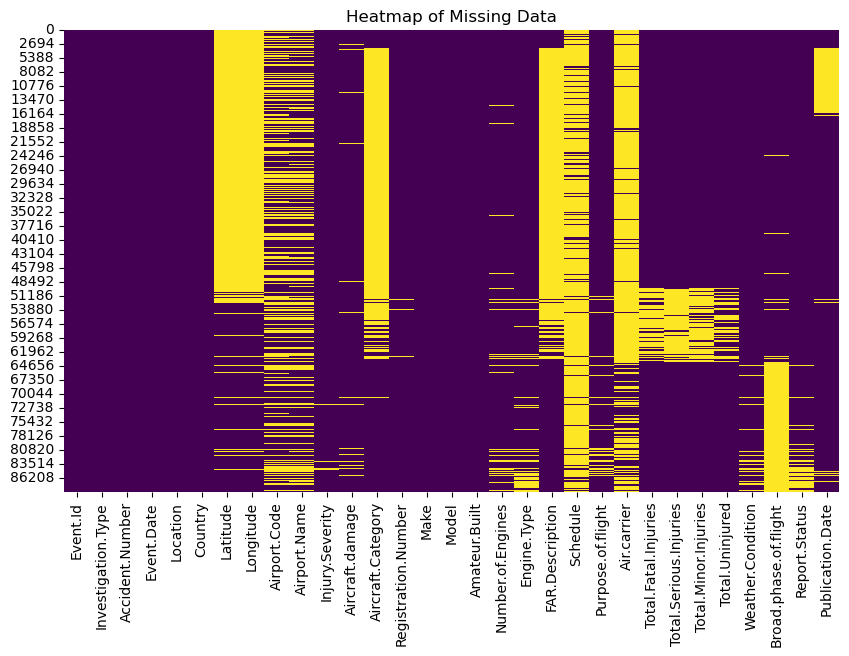

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(av_data.isnull(), cmap='viridis', cbar=False)
plt.title('Heatmap of Missing Data')
plt.show();

In [18]:
#Check for duplicate data

dup_state_codes=state_codes.duplicated().sum()
print(f'This data has {dup_state_codes} duplicates')

This data has 0 duplicates


In [19]:
#Check for duplicate data

dup_av_data=av_data.duplicated().sum()
print(f'This data has {dup_av_data} duplicates')

This data has 0 duplicates


In [20]:
#Create a data frame that you we can use and drop the ones that may contain null values and are not relevant.

rel_columns=['Make','Model','Number.of.Engines','Engine.Type','Event.Date','Location','Country','Injury.Severity','Aircraft.damage','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured','Weather.Condition','Broad.phase.of.flight','Report.Status']
df=av_data[rel_columns]
df.head(10)

,Make,Model,Number.of.Engines,Engine.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,Stinson,108-3,1.0,Reciprocating,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,Piper,PA24-180,1.0,Reciprocating,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,Cessna,172M,1.0,Reciprocating,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,Rockwell,112,1.0,Reciprocating,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,Cessna,501,NaN,NaN,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause
5,Mcdonnell Douglas,DC9,2.0,Turbo Fan,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause
6,Cessna,180,1.0,Reciprocating,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause
7,Cessna,140,1.0,Reciprocating,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause
8,Cessna,401B,2.0,Reciprocating,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause
9,North American,NAVION L-17B,1.0,Reciprocating,1982-01-01,"JACKSONVILLE, FL",United States,Non-Fatal,Substantial,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause


In [21]:
#checking null values in the new data frame
df.isna().sum()

Make                         63
Model                        92
Number.of.Engines          6084
Engine.Type                7096
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
dtype: int64

In [22]:
# Delete rows that critical information is missing
aviation_data_cleaned = df.dropna(subset=['Make', 'Model', 'Number.of.Engines', 'Engine.Type', 'Location', 'Country'])

In [23]:
aviation_data_cleaned.isna().sum().T

Make                          0
Model                         0
Number.of.Engines             0
Engine.Type                   0
Event.Date                    0
Location                      0
Country                       0
Injury.Severity             146
Aircraft.damage            1746
Total.Fatal.Injuries      10361
Total.Serious.Injuries    11194
Total.Minor.Injuries      10510
Total.Uninjured            4947
Weather.Condition           755
Broad.phase.of.flight     19212
Report.Status              1258
dtype: int64

In [24]:
# Handling missing values by filling with 0 where appropriate for injury columns
aviation_data_cleaned.loc[:, 'Total.Fatal.Injuries'] = aviation_data_cleaned['Total.Fatal.Injuries'].fillna(0)
aviation_data_cleaned.loc[:, 'Total.Serious.Injuries'] = aviation_data_cleaned['Total.Serious.Injuries'].fillna(0)
aviation_data_cleaned.loc[:, 'Total.Minor.Injuries'] = aviation_data_cleaned['Total.Minor.Injuries'].fillna(0)
aviation_data_cleaned.loc[:, 'Total.Uninjured'] = aviation_data_cleaned['Total.Uninjured'].fillna(0)

In [25]:
aviation_data_cleaned.isna().sum()

Make                          0
Model                         0
Number.of.Engines             0
Engine.Type                   0
Event.Date                    0
Location                      0
Country                       0
Injury.Severity             146
Aircraft.damage            1746
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition           755
Broad.phase.of.flight     19212
Report.Status              1258
dtype: int64

In [26]:
# We will add Unknown to blank spaces for injury severity, damages,weather, phase of flight and report status

aviation_data_cleaned.loc[:, 'Injury.Severity'] = aviation_data_cleaned['Injury.Severity'].fillna('Unknown')
aviation_data_cleaned.loc[:, 'Aircraft.damage'] = aviation_data_cleaned['Aircraft.damage'].fillna('Unknown')
aviation_data_cleaned.loc[:, 'Weather.Condition'] = aviation_data_cleaned['Weather.Condition'].fillna('Unknown')
aviation_data_cleaned.loc[:, 'Broad.phase.of.flight'] = aviation_data_cleaned['Broad.phase.of.flight'].fillna('Unknown')
aviation_data_cleaned.loc[:, 'Report.Status'] = aviation_data_cleaned['Report.Status'].fillna('Unknown')

In [27]:
aviation_data_cleaned.isna().sum()

Make                      0
Model                     0
Number.of.Engines         0
Engine.Type               0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
dtype: int64

In [28]:
aviation_data_cleaned.head(5)

,Make,Model,Number.of.Engines,Engine.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,Stinson,108-3,1.0,Reciprocating,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,Piper,PA24-180,1.0,Reciprocating,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,Cessna,172M,1.0,Reciprocating,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
3,Rockwell,112,1.0,Reciprocating,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
5,Mcdonnell Douglas,DC9,2.0,Turbo Fan,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,0.0,0.0,1.0,44.0,VMC,Climb,Probable Cause


In [56]:
#Remove The injury severity with numbers after
# Remove the bracket first
# Then remove the white space
aviation_data_cleaned.loc[:, 'Injury.Severity'] = aviation_data_cleaned['Injury.Severity'].str.split('(', expand=True)[0]
aviation_data_cleaned.loc[:, 'Injury.Severity'] = aviation_data_cleaned['Injury.Severity'].str.strip()
# Unique Values are now consistent

aviation_data_cleaned['Injury.Severity'].unique()

array(['Fatal', 'Non-Fatal', 'Incident', 'Unknown', 'Minor', 'Serious'],
      dtype=object)

In [30]:
#Check Unique values in all the columns
for column in aviation_data_cleaned.columns:
    unique_values = aviation_data_cleaned[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)

Unique values in 'Make':
['Stinson' 'Piper' 'Cessna' ... 'HIBBARD NORMAN E' 'WASZAK ARTHUR B'
 'STEPHEN J HOFFMAN']
Unique values in 'Model':
['108-3' 'PA24-180' '172M' ... '305C (0-1E)' 'ZENAIR CH 601 HD' 'MS-500']
Unique values in 'Number.of.Engines':
[1. 2. 0. 3. 4. 8.]
Unique values in 'Engine.Type':
['Reciprocating' 'Turbo Fan' 'Turbo Shaft' 'Unknown' 'Turbo Prop'
 'Turbo Jet' 'Electric' 'Hybrid Rocket' 'Geared Turbofan' 'LR' 'NONE'
 'UNK']
Unique values in 'Event.Date':
['1948-10-24' '1962-07-19' '1974-08-30' ... '2022-10-13' '2022-10-29'
 '2022-11-09']
Unique values in 'Location':
['MOOSE CREEK, ID' 'BRIDGEPORT, CA' 'Saltville, VA' ... 'Waldron, AR'
 'Iola, TX' 'Dacula, GA']
Unique values in 'Country':
['United States' 'GULF OF MEXICO' 'Puerto Rico' 'ATLANTIC OCEAN'
 'HIGH ISLAND' 'Bahamas' 'MISSING' 'Angola' 'Germany' 'Korea, Republic Of'
 'American Samoa' 'PACIFIC OCEAN' 'Canada' 'Bolivia' 'Mexico' 'Dominica'
 'Netherlands Antilles' 'Iceland' 'Guam' 'Australia' 'CARIBBEAN SEA'

In [58]:
# Replace data that may be the same from above

aviation_data_cleaned.loc[:, 'Aircraft.damage'] = aviation_data_cleaned['Aircraft.damage'].replace('No_Data', 'Unknown')
aviation_data_cleaned['Aircraft.damage'].unique()

array(['Destroyed', 'Substantial', 'Minor', 'Unknown', nan], dtype=object)

In [59]:
aviation_data_cleaned.loc[:,'Weather.Condition'] = aviation_data_cleaned['Weather.Condition'].replace(['No_Data', 'Unk','Unknown'], 'UNK')
aviation_data_cleaned['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC', nan], dtype=object)

In [60]:
aviation_data_cleaned.loc[:,'Broad.phase.of.flight'] = aviation_data_cleaned['Broad.phase.of.flight'].replace(['Other', 'No_Data'], 'Unknown')
aviation_data_cleaned['Broad.phase.of.flight'].unique()

array(['Cruise', 'Unknown', 'Climb', 'Takeoff', 'Landing', 'Approach',
       'Taxi', 'Descent', 'Maneuvering', 'Standing', 'Go-around', nan],
      dtype=object)

In [61]:
aviation_data_cleaned.loc[:,'Injury.Severity'] = aviation_data_cleaned['Injury.Severity'].replace(['Unavailable', 'No_Data'], 'Unknown')
aviation_data_cleaned['Injury.Severity'].unique()

array(['Fatal', 'Non-Fatal', 'Incident', 'Unknown', 'Minor', 'Serious',
       nan], dtype=object)

In [35]:
#Check for the unique values in the makes
unique_make_values = aviation_data_cleaned['Make'].unique()

# Sort the unique values alphabetically
unique_make_values_sorted = sorted(unique_make_values)

# Output the sorted unique values
print(f"Unique aircraft makes {unique_make_values}:")
print(unique_make_values_sorted)

Unique aircraft makes ['Stinson' 'Piper' 'Cessna' ... 'HIBBARD NORMAN E' 'WASZAK ARTHUR B'
 'STEPHEN J HOFFMAN']:
['107.5 Flying Corporation', '177MF LLC', '1st Ftr Gp', '2000 Mccoy', '2001 Mcgirl', '2003 Nash', '2007 Savage Air LLC', '2021FX3 LLC', '3XTRIM', '67 Flying Dutchman', '781569 INC', '85 Manista', 'A Pair Of Jacks', 'A. H. Gettings', 'A. Le Francois', 'AARDEMA ROBERT JOHN', 'AB SPORTINE AVIACIJA', 'ABBEY VICTOR', 'ACKLAND JEFFREY DEAN', 'ADAMS', 'ADAMS DONALD L', 'ADAMS JOHN R JR', 'ADRIAN GEORGE W', 'AERO ADVENTURE', 'AERO AT SP ZOO', 'AERO COMMANDER', 'AERO SMART SOLUTIONS INC', 'AERO SP Z O O', 'AERO VODOCHODY', 'AERO-ACE', 'AEROFAB INC', 'AEROFAB INC.', 'AEROLITE', 'AEROMOT', 'AERONCA', 'AEROPRAKT', 'AEROPRO CZ', 'AEROPRO CZ S R O', 'AEROS', 'AEROS LTD', 'AEROS LTD/SKYRANGER AIRCRAFT', 'AEROSPATIALE', 'AEROSPATIALE ALENIA', 'AEROSPORT LTD', 'AEROSTAR ACFT CORP OF TEXAS', 'AEROSTAR AIRCRAFT CORPORATION', 'AEROSTAR S A', 'AEROTECHNIK', 'AEROTEK', 'AEROTEK INC', 'AEROTRIKE'

In [36]:
#check the number of unique makes

unique_make_values = aviation_data_cleaned['Make'].nunique()
print(f'The unique makes are now {unique_make_values}.')

The unique makes are now 7514.


In [37]:
#The new shape of this data
aviation_data_cleaned.shape

(79475, 16)

In [38]:
unique_make_values_lower = [make.lower() for make in aviation_data_cleaned['Make']]

# Output the result
print("Unique aircraft makes in lowercase:")
print(unique_make_values_lower)

Unique aircraft makes in lowercase:
['stinson', 'piper', 'cessna', 'rockwell', 'mcdonnell douglas', 'cessna', 'cessna', 'cessna', 'north american', 'piper', 'beech', 'bellanca', 'cessna', 'navion', 'beech', 'enstrom', 'cessna', 'cessna', 'smith', 'cessna', 'cessna', 'bell', 'piper', 'grumman', 'cessna', 'beechcraft', 'maule', 'cessna', 'bellanca', 'cessna', 'air tractor', 'piper', 'piper', 'cessna', 'piper', 'navion', 'piper', 'piper', 'rockwell', 'piper', 'piper', 'cessna', 'cessna', 'cessna', 'aerospatiale', 'beech', 'cessna', 'mooney', 'boeing', 'cessna', 'beech', 'curtis', 'cessna', 'piper', 'cessna', 'cessna', 'piper', 'cessna', 'cessna', 'cessna', 'schleicher', 'cessna', 'cessna', 'piper', 'cessna', 'cessna', 'piper', 'cessna', 'piper', 'mooney', 'cessna', 'quickie', 'cessna', 'piper', 'cessna', 'cessna', 'cessna', 'lockheed', 'embraer', 'cessna', 'beech', 'grumman', 'boeing', 'piper', 'beech', 'piper', 'cessna', 'cessna', 'cessna', 'hughes', 'cessna', 'swearingen', 'beech', 'de 

In [62]:
# Creating a new column 'Make_Lower' with lowercase values of the 'Make' column
aviation_data_cleaned.loc[:,'Make_Lower'] = aviation_data_cleaned['Make'].str.lower()

# Display the first few rows to check the result
aviation_data_cleaned.head()


,Make,Model,Number.of.Engines,Engine.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Make_Lower,Year
0,Stinson,108-3,1.0,Reciprocating,1948-10-24,"MOOSE CREEK, ID",United States,Fatal,Destroyed,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,stinson,1948.0
1,Piper,PA24-180,1.0,Reciprocating,1962-07-19,"BRIDGEPORT, CA",United States,Fatal,Destroyed,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,piper,1962.0
2,Cessna,172M,1.0,Reciprocating,1974-08-30,"Saltville, VA",United States,Fatal,Destroyed,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,cessna,1974.0
3,Rockwell,112,1.0,Reciprocating,1977-06-19,"EUREKA, CA",United States,Fatal,Destroyed,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,rockwell,1977.0
5,Mcdonnell Douglas,DC9,2.0,Turbo Fan,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,0.0,0.0,1.0,44.0,VMC,Climb,Probable Cause,mcdonnell douglas,1979.0


In [40]:
# Counting unique values in the new 'Make_Lower' column
unique_make_lower_count = aviation_data_cleaned['Make_Lower'].nunique()

# Print the results
print(f"Unique aircraft makes in the 'Make_Lower' column: {unique_make_lower_count}")


Unique aircraft makes in the 'Make_Lower' column: 6974


In [41]:
aviation_data_cleaned.columns

Index(['Make', 'Model', 'Number.of.Engines', 'Engine.Type', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Make_Lower'],
      dtype='object')

In [64]:
aviation_data_cleaned.head(20)

,Make,Model,Number.of.Engines,Engine.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Make_Lower,Year
0,Stinson,108-3,1.0,Reciprocating,1948-10-24,"MOOSE CREEK, ID",United States,Fatal,Destroyed,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,stinson,1948.0
1,Piper,PA24-180,1.0,Reciprocating,1962-07-19,"BRIDGEPORT, CA",United States,Fatal,Destroyed,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,piper,1962.0
2,Cessna,172M,1.0,Reciprocating,1974-08-30,"Saltville, VA",United States,Fatal,Destroyed,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,cessna,1974.0
3,Rockwell,112,1.0,Reciprocating,1977-06-19,"EUREKA, CA",United States,Fatal,Destroyed,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,rockwell,1977.0
5,Mcdonnell Douglas,DC9,2.0,Turbo Fan,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,0.0,0.0,1.0,44.0,VMC,Climb,Probable Cause,mcdonnell douglas,1979.0
6,Cessna,180,1.0,Reciprocating,1981-08-01,"COTTON, MN",United States,Fatal,Destroyed,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,cessna,1981.0
7,Cessna,140,1.0,Reciprocating,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,cessna,1982.0
8,Cessna,401B,2.0,Reciprocating,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,cessna,1982.0
9,North American,NAVION L-17B,1.0,Reciprocating,1982-01-01,"JACKSONVILLE, FL",United States,Non-Fatal,Substantial,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,north american,1982.0
10,Piper,PA-28-161,1.0,Reciprocating,1982-01-01,"HOBBS, NM",United States,Non-Fatal,Substantial,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,piper,1982.0


In [42]:
aviation_data_cleaned['Model'].nunique()

10832

In [43]:
aviation_data_cleaned['Model'].unique()

array(['108-3', 'PA24-180', '172M', ..., '305C (0-1E)',
       'ZENAIR CH 601 HD', 'MS-500'], dtype=object)

## 2. Exploratory Data Analysis

Relationship analysis of the data

In [44]:
#Checking the top number of accidents per aircraft

top_aircraft_accidents = aviation_data_cleaned['Make_Lower'].value_counts().head(20)
top_aircraft_accidents


Make_Lower
cessna               25615
piper                14048
beech                 4959
bell                  2297
boeing                1530
mooney                1267
grumman               1143
bellanca              1018
robinson               969
hughes                 870
air tractor            638
aeronca                609
maule                  563
champion               499
schweizer              482
mcdonnell douglas      473
stinson                429
luscombe               400
aero commander         398
de havilland           385
Name: count, dtype: int64

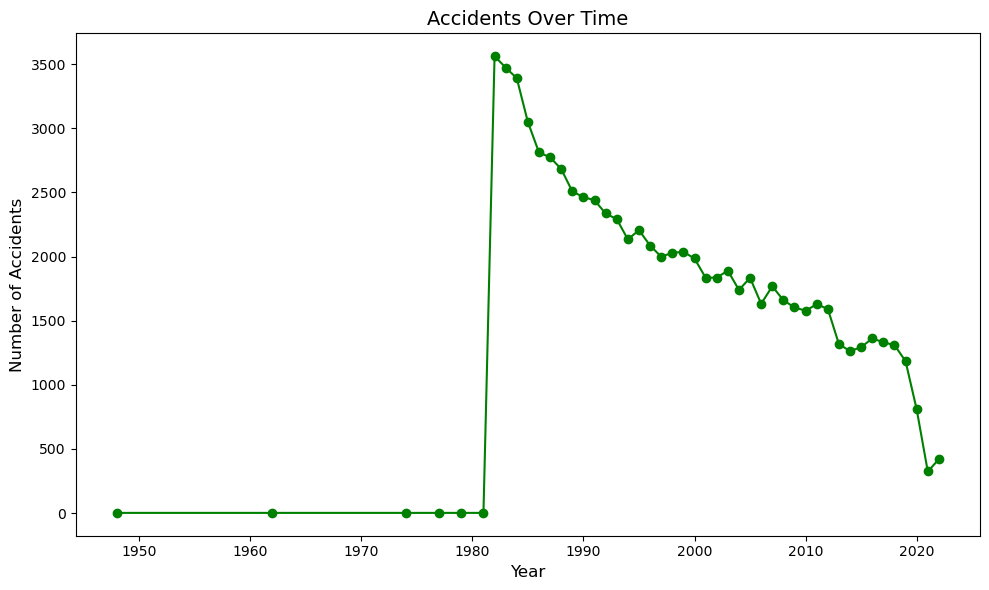

In [67]:
# Ensure the 'Event.Date' is in datetime format
aviation_data_cleaned.loc[:,'Event.Date'] = pd.to_datetime(aviation_data_cleaned['Event.Date'], errors='coerce')

# Extract the year and count accidents per year
aviation_data_cleaned.loc[:,'Year'] = aviation_data_cleaned['Event.Date'].dt.year
accidents_by_year = aviation_data_cleaned['Year'].value_counts().sort_index()

# Plot a line graph
plt.figure(figsize=(10, 6))
plt.plot(accidents_by_year.index, accidents_by_year.values, marker='o', linestyle='-', color='green')
plt.title('Accidents Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.tight_layout()
plt.show()


In [46]:
# Check the planes with the most severe accidents
# Severe injuries/fatal that are more than 0
severe_accidents = aviation_data_cleaned[aviation_data_cleaned['Total.Fatal.Injuries'] > 0]

# Count the number of fatal injuries per plane
fatal_accidents_by_make = severe_accidents['Make_Lower'].value_counts().head(10)

# print
print(fatal_accidents_by_make)

Make_Lower
cessna            3971
piper             2844
beech             1375
bell               404
mooney             349
bellanca           209
robinson           187
grumman            120
hughes             114
north american     112
Name: count, dtype: int64


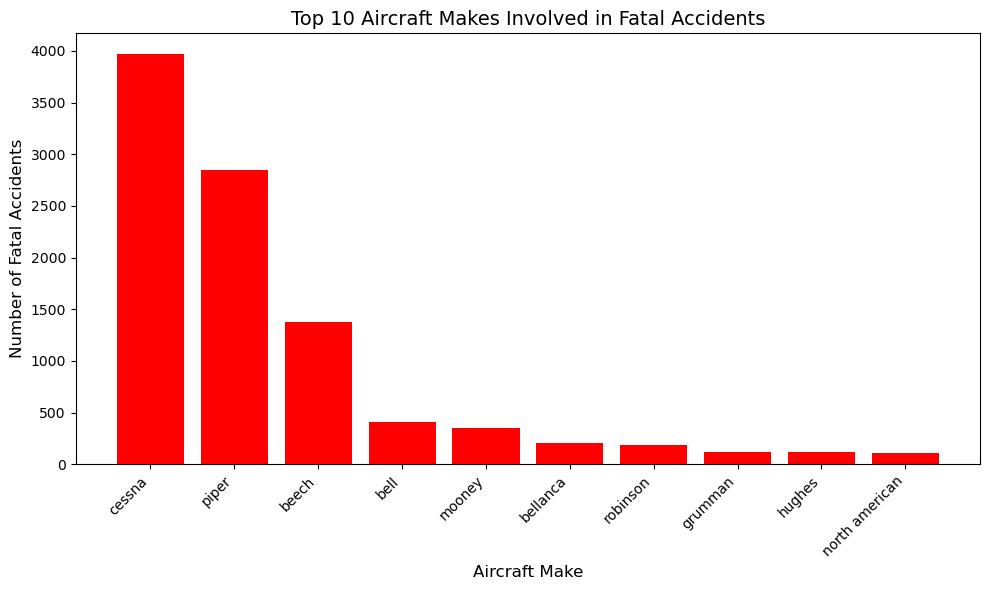

In [47]:
# Filter the severe accidents (with fatal injuries)
severe_accidents = aviation_data_cleaned[aviation_data_cleaned['Total.Fatal.Injuries'] > 0]

# Count the top 10 aircraft makes involved in fatal accidents
fatal_accidents_by_make = severe_accidents['Make_Lower'].value_counts().head(10)

# Create a bar graph using Matplotlib
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the data
plt.bar(fatal_accidents_by_make.index, fatal_accidents_by_make.values, color='red')

# Add titles and labels
plt.title('Top 10 Aircraft Makes Involved in Fatal Accidents', fontsize=14)
plt.xlabel('Aircraft Make', fontsize=12)
plt.ylabel('Number of Fatal Accidents', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [48]:
# Weather conditions when accident happened
aviation_data_cleaned['Weather.Condition'].value_counts()

Weather.Condition
VMC    72365
IMC     5586
UNK     1524
Name: count, dtype: int64

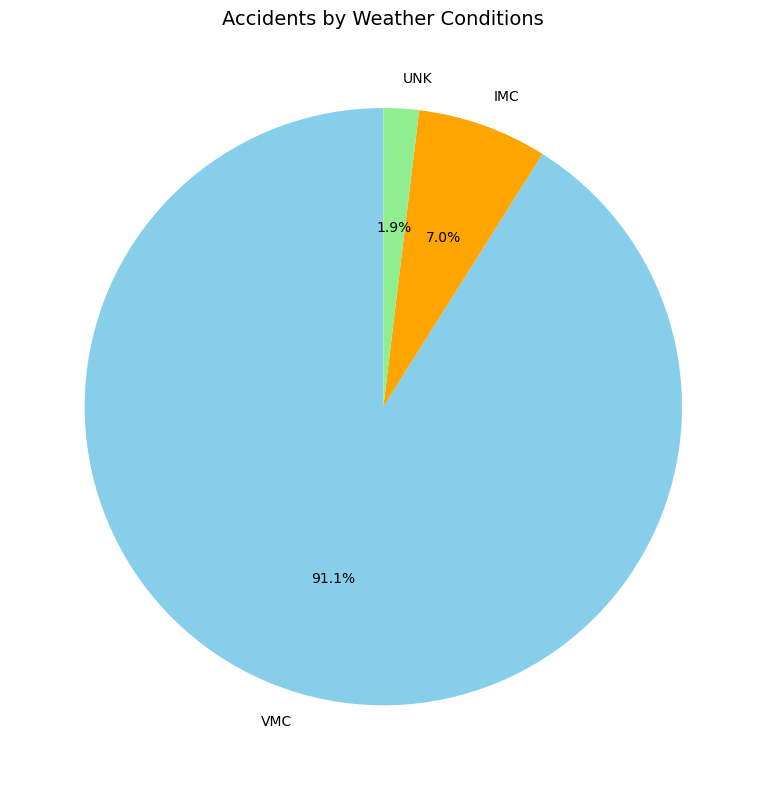

In [49]:
# Count accidents by weather conditions
weather_conditions = aviation_data_cleaned['Weather.Condition'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(weather_conditions.values, labels=weather_conditions.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange', 'lightgreen'])
plt.title('Accidents by Weather Conditions', fontsize=14)
plt.tight_layout()
plt.show()


In [50]:
aviation_data_cleaned['Broad.phase.of.flight'].value_counts()


Broad.phase.of.flight
Unknown        19854
Landing        14988
Takeoff        12262
Cruise         10093
Maneuvering     7992
Approach        6285
Climb           1992
Taxi            1938
Descent         1808
Go-around       1348
Standing         915
Name: count, dtype: int64

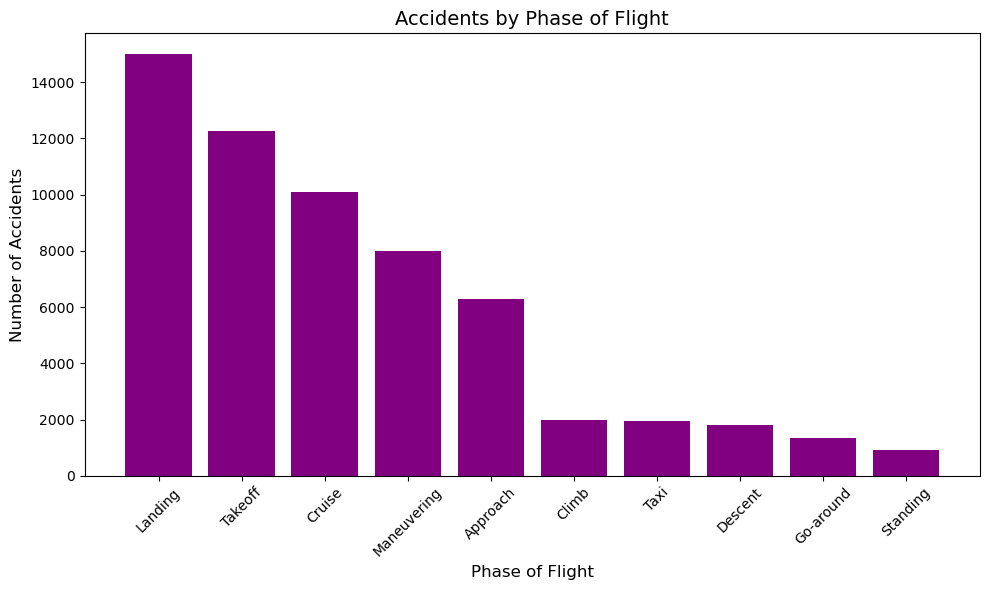

In [51]:
# Count accidents by the broad phase of flight excluding. Removing the unknown values
accidents_by_phase_filtered = aviation_data_cleaned[aviation_data_cleaned['Broad.phase.of.flight'] != 'Unknown']['Broad.phase.of.flight'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(accidents_by_phase_filtered.index, accidents_by_phase_filtered.values, color='purple')
plt.title('Accidents by Phase of Flight', fontsize=14)
plt.xlabel('Phase of Flight', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

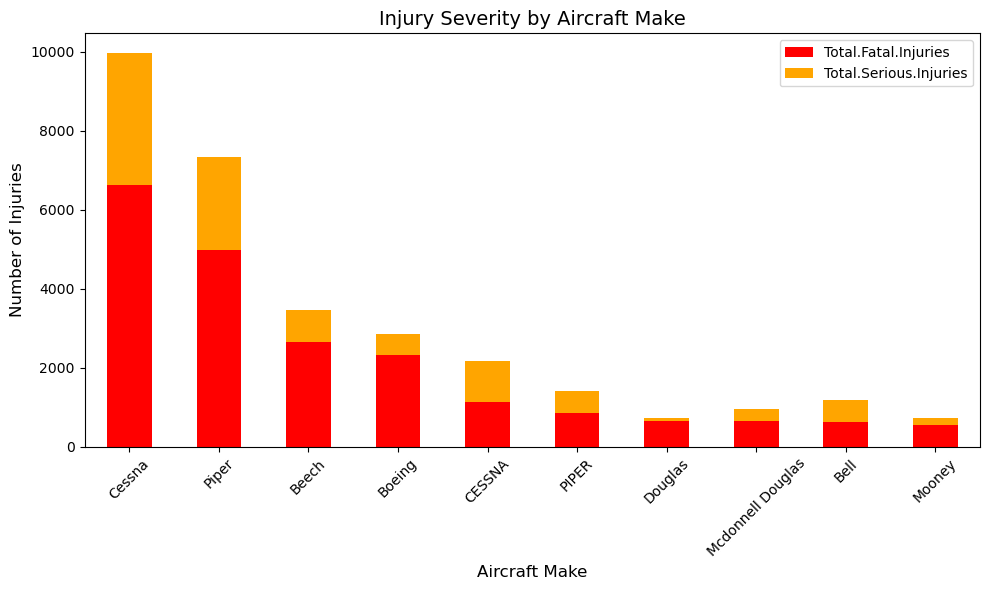

In [52]:
# Filter for fatal and serious injuries and group by aircraft make
injury_severity_by_make = aviation_data_cleaned.groupby('Make')[['Total.Fatal.Injuries', 'Total.Serious.Injuries']].sum().sort_values(by='Total.Fatal.Injuries', ascending=False).head(10)

# Plot a bar chart for injury severity
plt.figure(figsize=(10, 6))
injury_severity_by_make.plot(kind='bar', stacked=True, color=['red', 'orange'], figsize=(10, 6))
plt.title('Injury Severity by Aircraft Make', fontsize=14)
plt.xlabel('Aircraft Make', fontsize=12)
plt.ylabel('Number of Injuries', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Accidents per Make:
 Make_Lower
cessna      25615
piper       14048
beech        4959
bell         2297
boeing       1530
mooney       1267
grumman      1143
bellanca     1018
robinson      969
hughes        870
Name: count, dtype: int64


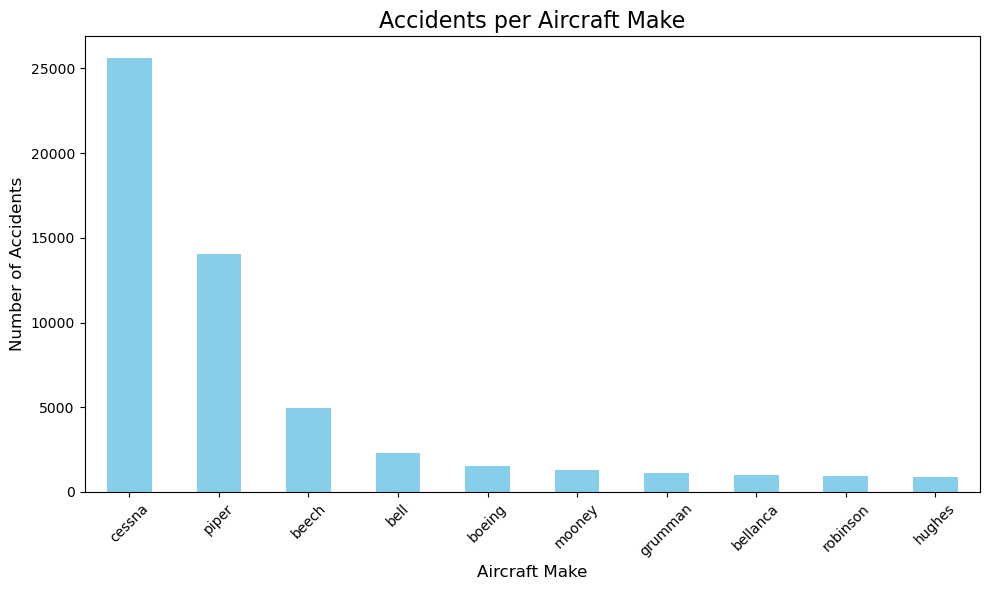

In [53]:
# Get the number of accidents per aircraft make
accidents_per_make = aviation_data_cleaned['Make_Lower'].value_counts()

print("Accidents per Make:\n", accidents_per_make.head(10))

# Bar plot to visualize the ratio of accidents to aircraft
accidents_per_make.head(10).plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Accidents per Aircraft Make', fontsize=16)
plt.xlabel('Aircraft Make', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


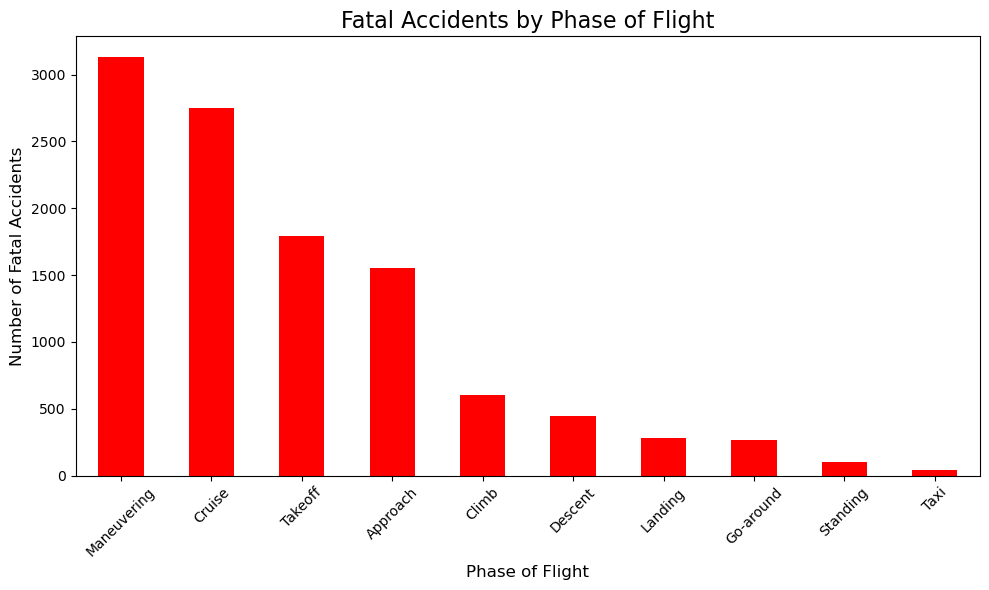

In [54]:
# Filter for fatal accidents (where total fatal injuries > 0)
fatal_accidents = aviation_data_cleaned[aviation_data_cleaned['Total.Fatal.Injuries'] > 0]

# Exclude unknown phases
fatal_accidents_cleaned = fatal_accidents[fatal_accidents['Broad.phase.of.flight'] != 'Unknown']

# Count fatal accidents by phase of flight
fatal_accidents_by_phase = fatal_accidents_cleaned['Broad.phase.of.flight'].value_counts()

# Plot the data
fatal_accidents_by_phase.plot(kind='bar', color='red', figsize=(10, 6))
plt.title('Fatal Accidents by Phase of Flight', fontsize=16)
plt.xlabel('Phase of Flight', fontsize=12)
plt.ylabel('Number of Fatal Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 3. Exorting the data into an Excel for Tableau Visualization

In [55]:
# Export the cleaned data for Tableau
aviation_data_cleaned.to_csv('aviation_data_cleaned.csv', index=False)
